In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import numpy.random as r
from tqdm import tqdm
from scipy.optimize import minimize_scalar
from functools import partial
import math

Text(0, 0.5, '$θ_a/\\pi$')

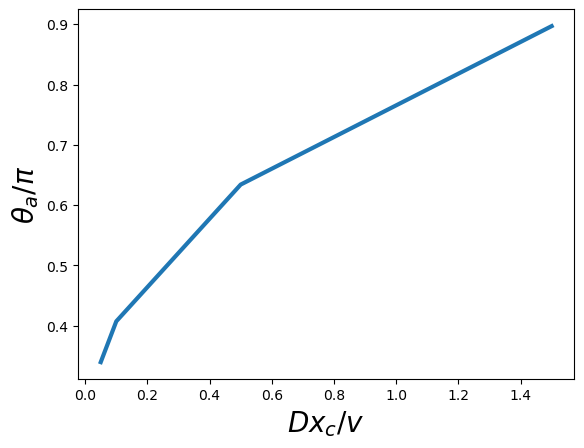

In [76]:
def equation(theta_b, D):
    return 0.5 * np.sin(theta_b) * theta_b + np.cos(theta_b) - (1 - D)

# Generate a range of values for D
D_values = [0.05,0.1,0.5,1.5]  # Adjust the range as needed
D_plot=[]
# Solve the equation for each D value within the range (0, pi)
theta_b_values = []
for D in D_values:
    theta_b = fsolve(equation, 0.5*np.pi, args=(D,))
    if 0 <= theta_b <= np.pi:
        theta_b_values.append(theta_b[0]/np.pi)
        D_plot.append(D)

# Plot the solution
plt.plot(D_plot, theta_b_values,linewidth=3)
plt.xlabel(r'$Dx_c/v$',fontsize=20)
plt.ylabel(r'$θ_a/\pi$',fontsize=20)

In [77]:
D_values

[0.05, 0.1, 0.5, 1.5]

In [78]:
nstep=500
dt=0.01
n_traj=10

t=dt*nstep

for i in range(len(theta_b_values)):
    r.seed(1995)
    theta_b=theta_b_values[i]*np.pi
    D=D_plot[i]
    print("D="+str(D))
    
    cs=[]
    for j in range(n_traj):
        theta=0 
        cost=0
        x=[0]
        y=[0]
        reors=[]
        for _ in range(nstep):
            theta=theta+np.sqrt(2*D*dt)*r.normal()
            if np.abs(theta)>theta_b:
                theta=0
                cost=cost+1
                reors.append([x[-1],y[-1]])
            cost=cost-np.cos(theta)*dt
            x.append(x[-1]+np.cos(theta)*dt)
            y.append(y[-1]+np.sin(theta)*dt)
        plt.plot(x,y)
        
        for [x,y] in reors:
            plt.scatter(x,y,color='r')
        
        cs.append(-cost/t)
    plt.xlim(0,5)
    plt.ylim(-3.4,3.4)
    plt.xlabel(r"$x$",fontsize=25)
    plt.ylabel(r"$y$",fontsize=25)
    plt.savefig("traj_"+str(D)+".pdf")
    plt.close()


D=0.05
D=0.1
D=0.5
D=1.5


In [79]:
nstep=500
dt=0.01
n_traj=1000

t=dt*nstep

for i in range(len(theta_b_values)):
    r.seed(1995)
    theta_b=theta_b_values[i]*np.pi
    D=D_plot[i]
    print("D="+str(D))
    
    cs=[]
    for j in range(n_traj):
        theta=0 
        cost=0
        x=[0]
        y=[0]
        reors=[]
        for _ in range(nstep):
            theta=theta+np.sqrt(2*D*dt)*r.normal()
            if np.abs(theta)>theta_b:
                theta=0
                cost=cost+1
                reors.append([x[-1],y[-1]])
            cost=cost-np.cos(theta)*dt
            x.append(x[-1]+np.cos(theta)*dt)
            y.append(y[-1]+np.sin(theta)*dt)
        cs.append(-cost)
    plt.figure(figsize=(4, 6))
    
    # Create a boxplot
    plt.boxplot(cs, patch_artist=True, boxprops=dict(facecolor='orange', color='black'))
    
    # Annotate with sample size
    #n_traj_text = f"n = {n_traj}"
    #plt.text(1.1, min(cs) - 0.1, n_traj_text, fontsize=12, ha='center', va='top')
    
    # Add labels and customize
    plt.xticks([1], [''])
    plt.ylabel(r'Effective $x$-displacement', fontsize=25)
    plt.ylim(-5,5)
    # Style adjustments
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig("x_displ_"+str(D)+".pdf")
    plt.close()

D=0.05
D=0.1
D=0.5
D=1.5


In [80]:
nstep=500
dt=0.01
n_traj=1000

t=dt*nstep

for i in range(len(theta_b_values)):
    r.seed(1995)
    theta_b=theta_b_values[i]*np.pi
    D=D_plot[i]
    print("D="+str(D))
    
    cs=[]
    for j in range(n_traj):
        theta=0 
        cost=0
        x=[0]
        y=[0]
        reors=[]
        for _ in range(nstep):
            theta=theta+np.sqrt(2*D*dt)*r.normal()
            if np.abs(theta)>theta_b:
                theta=0
                cost=cost+1
                reors.append([x[-1],y[-1]])
            cost=cost-np.cos(theta)*dt
            x.append(x[-1]+np.cos(theta)*dt)
            y.append(y[-1]+np.sin(theta)*dt)
        cs.append(np.abs(y[-1]))
    plt.figure(figsize=(4, 6))
    
    # Create a boxplot
    plt.boxplot(cs, patch_artist=True, boxprops=dict(facecolor='orange', color='black'))
    
    # Annotate with sample size
    #n_traj_text = f"n = {n_traj}"
    #plt.text(1.1, min(cs) - 0.1, n_traj_text, fontsize=12, ha='center', va='top')
    
    # Add labels and customize
    plt.xticks([1], [''])
    plt.ylabel(r'Lateral displacement', fontsize=25)
    plt.ylim(0,5)
    # Style adjustments
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig("y_displ_"+str(D)+".pdf")
    plt.close()

D=0.05
D=0.1
D=0.5
D=1.5
